# PMGSY Road & Bridge Project Dashboard
This dashboard provides visual insights into road and bridge works sanctioned, completed, and pending across Indian states and districts under the PMGSY schemes.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [6]:
# Load dataset
df = pd.read_csv(r"C:\Users\sahup\OneDrive\Desktop\python dataset\Python_dataset.csv")
df.head()

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,NO_OF_BRIDGES_COMPLETED,NO_OF_ROAD_WORKS_BALANCE,NO_OF_BRIDGES_BALANCE,LENGTH_OF_ROAD_WORK_SANCTIONED_KM,COST_OF_WORKS_SANCTIONED_LAKHS,LENGTH_OF_ROAD_WORK_COMPLETED_KM,EXPENDITURE_OCCURED_LAKHS,LENGTH_OF_ROAD_WORK_BALANCE_KM
0,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,0,32,0,0,0,60.169,24.6908,59.190,19.6281,0.00
1,Andaman And Nicobar,North and Middle Andaman,PMGSY-II,24,0,0,0,24,0,54.670,27.7646,7.400,0.0000,47.27
2,Andhra Pradesh,Alluri Sitharama Raju,PMGSY-I,472,17,467,14,5,3,1952.378,775.6992,1809.482,702.0291,24.34
3,Andhra Pradesh,Anakapalli,PMGSY-II,5,0,5,0,0,0,34.620,21.3090,31.291,16.1277,0.00
4,Andhra Pradesh,Anantapur,PMGSY-III,16,5,14,0,2,5,145.623,109.8399,122.207,68.9612,18.70


## Overview Metrics

In [7]:
total_works = df['NO_OF_ROAD_WORK_SANCTIONED'].sum()
completed_works = df['NO_OF_ROAD_WORKS_COMPLETED'].sum()
pending_works = df['NO_OF_ROAD_WORKS_BALANCE'].sum()

print(f"Total Road Works Sanctioned: {total_works}")
print(f"Completed Road Works: {completed_works}")
print(f"Pending Road Works: {pending_works}")


Total Road Works Sanctioned: 190621
Completed Road Works: 182157
Pending Road Works: 8464


## State-wise Road Work Completion

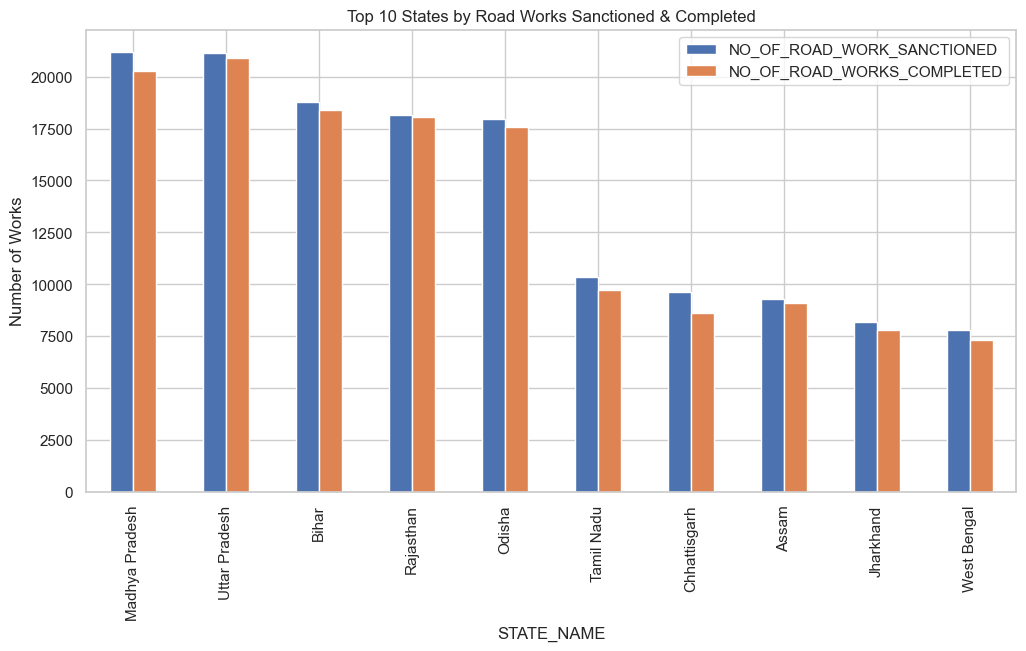

In [8]:
state_data = df.groupby('STATE_NAME')[['NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_ROAD_WORKS_COMPLETED']].sum().sort_values(by='NO_OF_ROAD_WORK_SANCTIONED', ascending=False).head(10)
state_data.plot(kind='bar', stacked=False, title='Top 10 States by Road Works Sanctioned & Completed')
plt.ylabel("Number of Works")
plt.show()

## Scheme-wise Road Work Summary

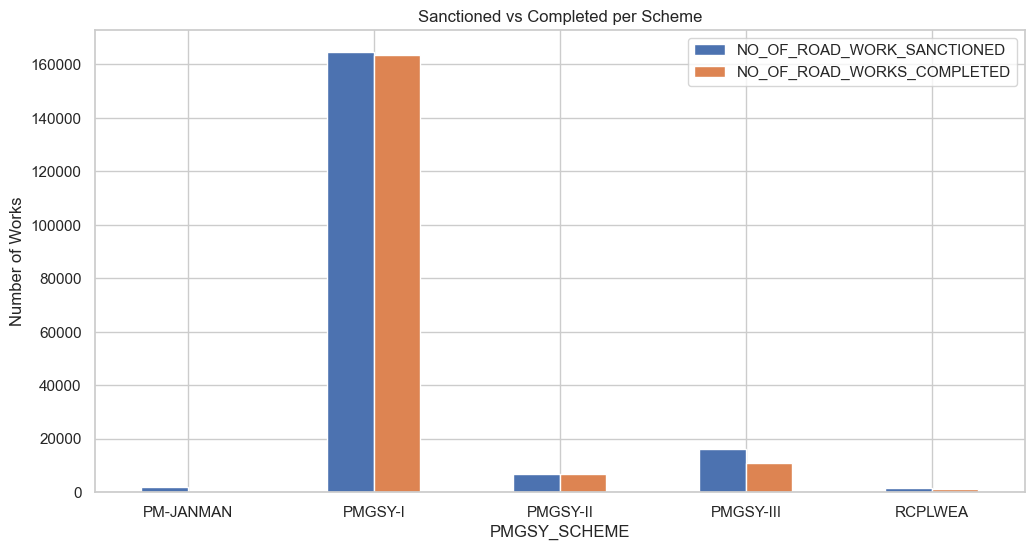

In [9]:
scheme_data = df.groupby('PMGSY_SCHEME')[['NO_OF_ROAD_WORK_SANCTIONED', 'NO_OF_ROAD_WORKS_COMPLETED']].sum()
scheme_data.plot(kind='bar', title='Sanctioned vs Completed per Scheme')
plt.ylabel("Number of Works")
plt.xticks(rotation=0)
plt.show()

## Cost vs Expenditure

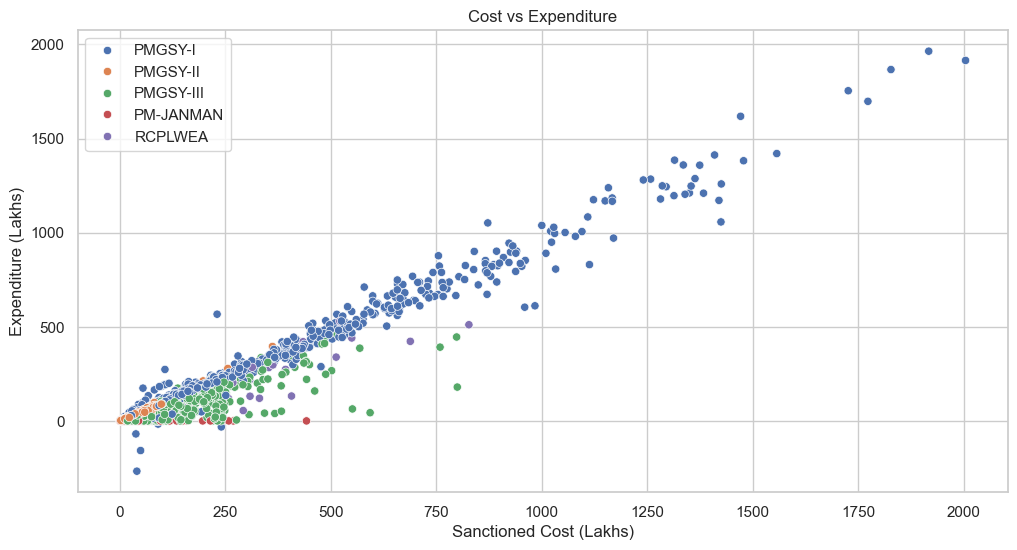

In [10]:
sns.scatterplot(data=df, x='COST_OF_WORKS_SANCTIONED_LAKHS', y='EXPENDITURE_OCCURED_LAKHS', hue='PMGSY_SCHEME')
plt.title('Cost vs Expenditure')
plt.xlabel("Sanctioned Cost (Lakhs)")
plt.ylabel("Expenditure (Lakhs)")
plt.legend()
plt.show()

## Road Length Completion Progress

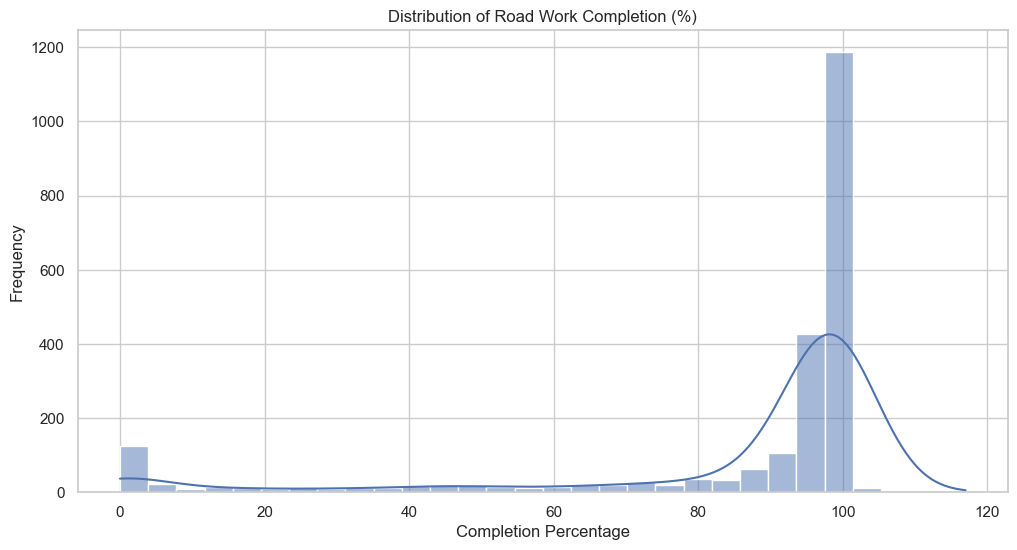

In [11]:
df['COMPLETION_PERCENT'] = (df['LENGTH_OF_ROAD_WORK_COMPLETED_KM'] / df['LENGTH_OF_ROAD_WORK_SANCTIONED_KM']) * 100
sns.histplot(df['COMPLETION_PERCENT'].dropna(), bins=30, kde=True)
plt.title("Distribution of Road Work Completion (%)")
plt.xlabel("Completion Percentage")
plt.ylabel("Frequency")
plt.show()

## Heatmap: Top 10 States by Completion %

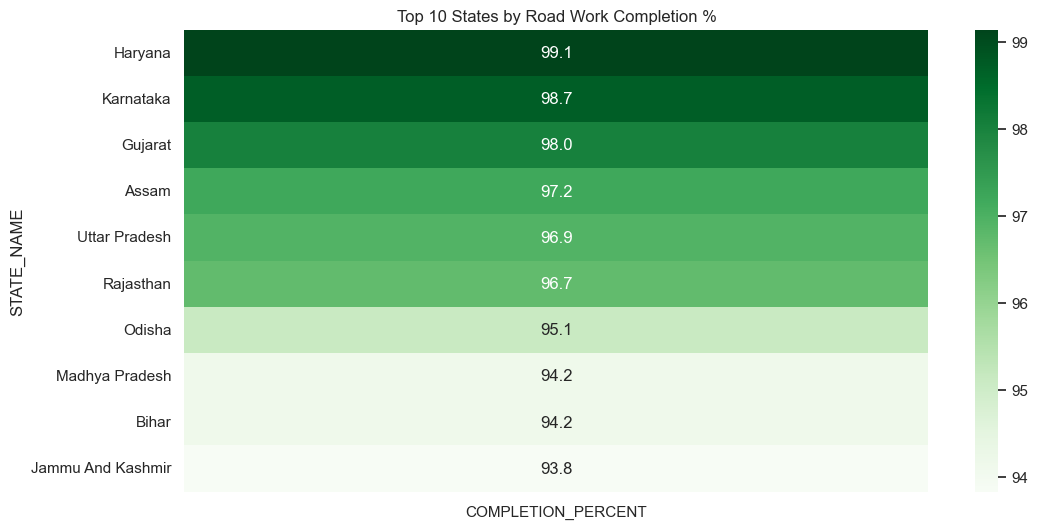

In [12]:
top_states = df.groupby('STATE_NAME')[['LENGTH_OF_ROAD_WORK_COMPLETED_KM', 'LENGTH_OF_ROAD_WORK_SANCTIONED_KM']].sum()
top_states['COMPLETION_PERCENT'] = (top_states['LENGTH_OF_ROAD_WORK_COMPLETED_KM'] / top_states['LENGTH_OF_ROAD_WORK_SANCTIONED_KM']) * 100
top_10 = top_states.sort_values(by='COMPLETION_PERCENT', ascending=False).head(10)
sns.heatmap(top_10[['COMPLETION_PERCENT']], annot=True, cmap='Greens', fmt=".1f")
plt.title("Top 10 States by Road Work Completion %")
plt.show()